### Figure 2 for Siddiqui et al 

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '28',
         'axes.titlesize':'24',
         'xtick.labelsize':'28',
         'ytick.labelsize': '28'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [5]:
od = ospy.open_oceandataset.from_catalog('ECCO')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


## drop unnecesary variables (k's)

In [6]:
# some bookkeeping
_ds = od._ds.drop({'k', 'k_p1','k_l','k_u'})
_ds = od._ds.drop_dims({'nv'})
od._ds = _ds

In [7]:
%%time
## Parameters




## Parameters
varList = ['SALT','ETAN']
YRange = [0,90] # degrees latitude
XRange = [-70, -2.5] # longitude
add_Hbdr = False
mask_outside = True
ZRange = None
add_Vbdr = False
timeRange = None
timeFreq= None
sampMethod = 'snapshot'
dropAxes = False
## Transformation parameters
centered= 'Atlantic'
transformation = 'arctic_crown'



## Carrying out the cutout
cut_od = ospy.subsample.cutout(od,varList,YRange,XRange,add_Hbdr,mask_outside,
                                   ZRange,add_Vbdr,timeRange,timeFreq,sampMethod,dropAxes,
                                   centered=centered)

Cutting out the oceandataset.
faces in the cutout [1, 2, 6, 10, 11]
CPU times: user 14.2 s, sys: 616 ms, total: 14.8 s
Wall time: 14.7 s


In [8]:
cut_od.dataset.nbytes * 1e-9

0.8535482320000001

In [9]:
# Masking the depth
#cut_od._ds = cut_od._ds.where(cut_od._ds.Depth>0)
cut_od._ds['Depth_masked'] = cut_od._ds['Depth']
depth_masked = cut_od._ds['Depth_masked']
depth_masked = depth_masked.where(depth_masked>0)
cut_od._ds['Depth_masked'] = depth_masked

## Making sections for OVIDE, ELLET

Spatial information for the lines could simply be input after opening the datafiles on Sciserver instead of doing it this way.

In [10]:
iceland_lats = [45, 65, 65, 45, 45]
iceland_lons = [-30, -30, -10, -10, -30]

In [11]:
od_surv_iceland = cut_od.subsample.mooring_array(
    Xmoor=iceland_lons,
    Ymoor=iceland_lats,
    varList=[ 'SALT']
)

Cutting out the oceandataset.
Extracting mooring array.


In [12]:
# opening files from CCHDO https://cchdo.ucsd.edu/
ds_ovide = xr.open_dataset('data/ovide_2016_CTDO2.nc') 

In [13]:
ds_ovide

<xarray.Dataset>
Dimensions:                   (N_PARAM: 25, N_PROF: 136, N_LEVELS: 5445,
                               N_PARAM_CHIM: 9, N_BOTTLES: 28)
Dimensions without coordinates: N_PARAM, N_PROF, N_LEVELS, N_PARAM_CHIM,
                                N_BOTTLES
Data variables: (12/129)
    STATION_PARAMETER         (N_PARAM) |S4 ...
    SHIP_NAME                 (N_PROF) |S30 ...
    SHIP_WMO_ID               (N_PROF) |S16 ...
    PI_NAME                   (N_PROF) |S64 ...
    PI_ORGANISM               (N_PROF) |S16 ...
    CRUISE_NAME               (N_PROF) |S16 ...
    ...                        ...
    CHTMPOB_RESP              (N_PROF) object ...
    CHTMPOB_RESP_ORG          (N_PROF) object ...
    CHTMPOB_PREC              (N_PROF) float32 ...
    CHOXYKPD                  (N_PROF, N_BOTTLES) float32 ...
    CHOXYLPD                  (N_PROF, N_BOTTLES) float32 ...
    CHOXYKBD_QC               (N_PROF, N_BOTTLES) float32 ...
Attributes: (12/17)
    Data_type:             CTD
    Format_version:        MLT 1.0-2014
    Reference_date_time:   19500101000000
    Reference_param:       PRES
    Project_name:          OVIDE
    Date_creation:         20170703172159
    ...                    ...
    North_latitude:        63.41648
    West_longitude:        -43.07546
    East_longitude:        -9.4641
    Coord_system:          GEOGRAPHICAL-WGS84
    Data_level:            L2B
    CHEMISTRY_PARAMETERS:  Y

In [14]:
## OVIDE information 
lats_ovide = np.flip(ds_ovide.LATITUDE[0:95].values)

lons_ovide =  np.flip(ds_ovide.LONGITUDE[0:95].values)

depth_ovide = [0, -5346]


# Extract ship survey and fields used by this notebook
od_surv_ovide = cut_od.subsample.survey_stations(
    Xsurv=lons_ovide,
    Ysurv=lats_ovide,
    ZRange=depth_ovide,
    varList=[ 'SALT']
)


Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].


In [15]:
# fig = plt.figure(figsize=(20,8))
# ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
# levels_salt_ovide = np.linspace(34.5,35.8,40)
# # levels_salt_ovide = np.linspace(34.5,ds_ovide.PSAL.max(),50)

# c0=ax1.contourf(od_surv_ovide._ds['station_dist'], np.flip(ds_ovide.PARAM_REF), np.flip(ds_ovide.PSAL[0:95].transpose()),
#                 levels_salt_ovide, cmap=cmocean.cm.haline, extend='both')

# CS4 = ax1.contour(od_surv_ovide._ds['station_dist'], np.flip(ds_ovide.PARAM_REF), np.flip(ds_ovide.PSAL[0:95].transpose()),
#                   [35.2], colors=('k',), linewidths=(3,))

# ax1.clabel(CS4, fmt='%2.1f', inline_spacing=10, colors='k', fontsize=28)


# ax1.invert_yaxis()
# ax1.set_xticks([])

# ax1.set_yticks([0,1000,2000,3000,4000,5000])
# ax1.set_yticklabels(['0','-1000','-2000','-3000','-4000','-5000'])
# ax1.set_facecolor('black')
# #ax1.set_title('OVIDE line (Winter 1994)')
# #ax1.set_ylabel('[Depth]')
# ax1.vlines([15], 0, 1, transform=ax1.get_xaxis_transform(),color='purple',linestyle='dashed')


In [16]:
od_surv_ovide._ds = od_surv_ovide._ds.where(od_surv_ovide._ds.SALT>34)

In [17]:
ds_ovide.PSAL[30:95-30,0:200].mean()

<xarray.DataArray 'PSAL' ()>
array(35.148907, dtype=float32)

In [20]:
ds_ellet = xr.open_dataset('data/74EQ20160607_ctd.nc') # 2016 summer

In [21]:
## Extended ELLET information
lats_ellet = ds_ellet.latitude[1:65].values

lons_ellet = ds_ellet.longitude[1:65].values

depth_ellet = [0, -3000]


# Extract ship survey and fields used by this notebook
od_surv_ellet = cut_od.subsample.survey_stations(
    Xsurv=lons_ellet,
    Ysurv=lats_ellet,
    ZRange=depth_ellet,
    varList=['SALT']
)

Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].


In [23]:
od_surv_ellet._ds = od_surv_ellet._ds.where(od_surv_ellet._ds.SALT>34)

### Viz the sections

In [26]:
cut_od = cut_od.set_projection('PlateCarree', central_longitude=-40)

## Creating the ETA following section

In [27]:
cut_od._ds['mean_ETA'] = cut_od._ds['ETAN'].mean('time')

In [28]:
cut_od._ds['SALT_masked'] = cut_od._ds['SALT']
salt_masked = cut_od._ds['SALT_masked']
salt_masked = salt_masked.where(salt_masked>0)
cut_od._ds['SALT_masked'] = salt_masked

In [29]:
grid = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/ETOPO/ETOPO1_Ice_g_gmt4.grd', decode_cf=True, engine='netcdf4')

In [30]:
grid.nbytes * 1.0e-9

1.8667584240000001

In [31]:
grid=grid.sel(y=slice(0,90), x=slice(-120,50)).where(grid.z>0)

In [32]:
grid.nbytes * 1.0e-9

0.44088962400000004

In [33]:
grid=grid.load()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


/tmp/ipykernel_3185/3228548282.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('gray', 256)
/tmp/ipykernel_3185/3228548282.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_big = cm.get_cmap('gray')


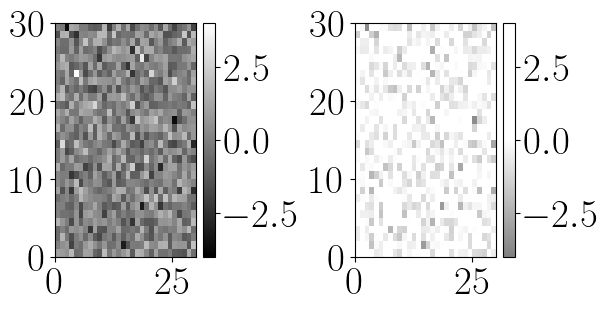

In [35]:
viridis = cm.get_cmap('gray', 256)
viridis_big = cm.get_cmap('gray')
newcmp = ListedColormap(viridis_big(np.linspace(0.5,1.5, 128)))
plot_examples([viridis, newcmp])

Computing weighted_mean.


/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Computing weighted_mean.
Computing weighted_mean.


/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Computing weighted_mean.
Computing weighted_mean.


/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 6min 20s, sys: 33.2 s, total: 6min 53s
Wall time: 3min 9s


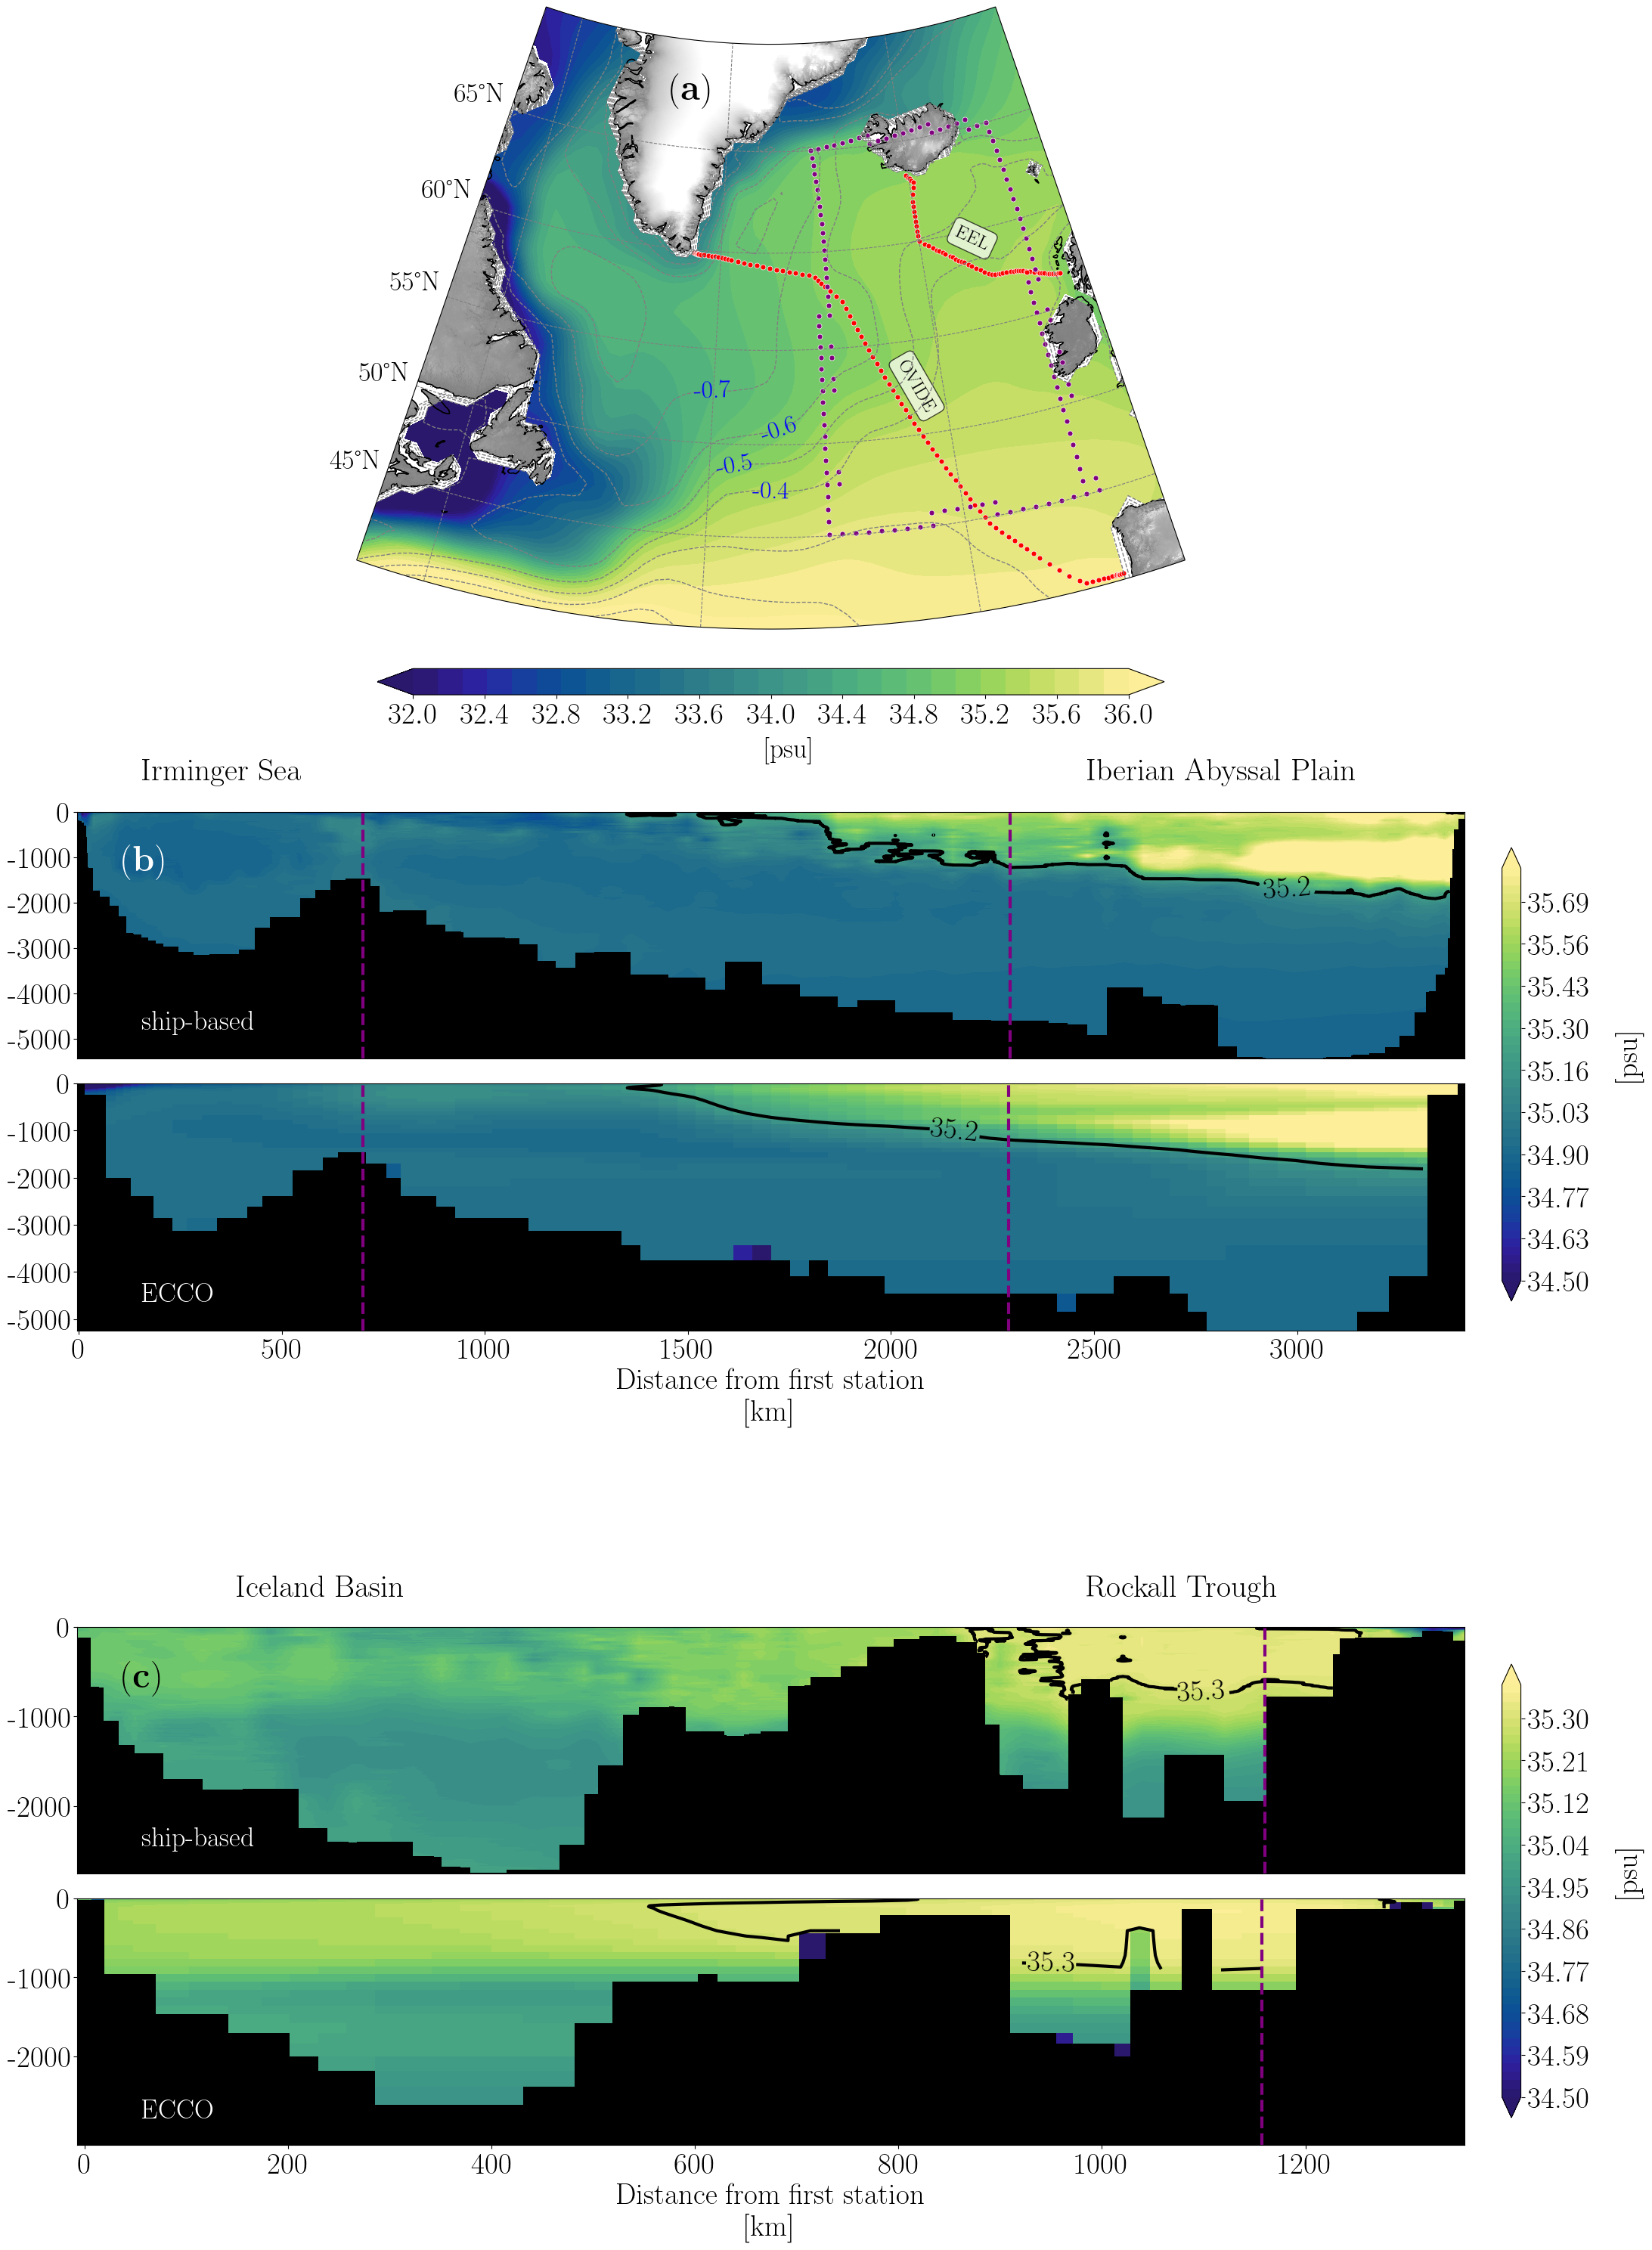

In [39]:
%%time

fig = plt.figure(figsize=[25,30])

# plotting the iceland basin

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# defining the projection 
lon1, lon2, lat1, lat2 = [-65, -5, 40, 70]

rect = mpath.Path([[lon1, lat1], [lon2, lat1],
    [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

name='LambertConformal'
proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
    central_latitude=(lat1+lat2)*0.5)


ax1 = plt.subplot2grid((8, 5), (0, 1), colspan=3, rowspan=3, projection=proj)
ax2 = plt.subplot2grid((8,5), (3,0), rowspan=1, colspan=5)
ax3 = plt.subplot2grid((8,5), (4,0), rowspan=1, colspan=5)

ax4 = plt.subplot2grid((8, 5), (6, 0), rowspan=1, colspan=5)
ax5 = plt.subplot2grid((8, 5), (7, 0), rowspan=1, colspan=5)

                       
# defining levels for the pcolormesh
cmap = cmocean.cm.balance
levels = MaxNLocator(nbins=100).tick_values(32,36)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# # pcolormesh plot
#im = plt.contourf(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.SALT_masked.isel(Z=0).mean('time'), levels=np.linspace(32,36,30),extend='both', cmap=cmocean.cm.haline,
#             transform=ccrs.PlateCarree())

# # Adding etopop
ax1.pcolormesh(grid.x[::4], grid.y[::4], grid.z[::4,::4], transform=ccrs.PlateCarree(), cmap=newcmp, zorder=-10)

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)

ax1.set_boundary(rect_in_target)
ax1.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax1.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
ax1.coastlines()
#ax.add_feature(land_50m) 

gl=ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, color='gray', linestyle='dashed')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=False
gl.rotate_labels=False
gl.xlocator=ctk.LongitudeLocator(3)
gl.ylocator=ctk.LatitudeLocator()
gl.xformatter=ctk.LongitudeFormatter()
gl.yformatter=ctk.LatitudeFormatter()
gl.xlabel_style = {'size': 20, 'color': 'white'}
gl.ylabel_style = {'size': 26, 'color': 'black', 'va': 'bottom', 'ha':'right'}


co = ax1.contourf(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.SALT_masked.isel(Z=0).mean('time'), levels=np.linspace(32,36,30),extend='both', cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree(), zorder=-10)
CS = ax1.contour(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.ETAN.mean('time'),
                [-0.8,-0.7,-0.6, -0.5, -0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], 
                linewidths=[1.0], colors='gray',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree(), zorder=5)


# labelling contours
lons=np.array([-35,-38,-35,-40])
lats=np.array([47,49,52,52])

lambert_coords = proj.transform_points(ccrs.PlateCarree(), lons, lats)
lambert_coords_new = []
for entry in range(0,len(lambert_coords)):
    lambert_coords_new.append(lambert_coords[entry][0:-1])
ax1.clabel(CS, levels=[-0.4,-0.5,-0.6,-0.7], inline=True,  inline_spacing=-10, manual=lambert_coords_new , fmt='%1.1f', colors='b', fontsize=24)


ax1.coastlines()

#Draw the colorbar
cbar=fig.colorbar(co, ax=ax1, orientation='horizontal', ticks=np.linspace(32,36,11), pad=0.05, shrink =0.95, aspect = 30)
plt.figtext(0.43,0.66, '[psu]', fontsize=26)

XC_ovide = np.flip(ds_ovide.LONGITUDE[0:95].values)
YC_ovide = np.flip(ds_ovide.LATITUDE[0:95].values)
XC_ellet = ds_ellet.longitude[1:65].values
YC_ellet = ds_ellet.latitude[1:65].values

XC_iceland = od_surv_iceland.dataset['XC'].squeeze()
YC_iceland = od_surv_iceland.dataset['YC'].squeeze()

#ax.set_extent([-65, 0, 35, 85], crs=ccrs.PlateCarree())
ovide_line = ax1.plot(XC_ovide, YC_ovide, 'o', markersize=5, markerfacecolor='r',
             markeredgewidth=0.5, markeredgecolor='w' , transform=ccrs.PlateCarree())
ellet_line = ax1.plot(XC_ellet, YC_ellet, 'o', markersize=5, markerfacecolor='r',
             markeredgewidth=0.5, markeredgecolor='w', transform=ccrs.PlateCarree())
iceland_basin = ax1.plot(XC_iceland, YC_iceland, 'o', markersize=5, markerfacecolor='purple',
             markeredgewidth=0.5, markeredgecolor='w', transform=ccrs.PlateCarree())

props = dict(boxstyle='round', facecolor='white', alpha=0.7)

#place a text box in upper left in axes coords
ax1.text(0.65, 0.35, 'OVIDE', transform=ax1.transAxes, fontsize=18,
         rotation=300.0, bbox=props, weight='bold')
ax1.text(0.72, 0.61, 'EEL', transform=ax1.transAxes, fontsize=18,
         rotation=335.0, bbox=props, weight='bold')

#########################


#levels_salt_ovide = np.linspace(34.5,ds_ovide.ctd_salinity.max(),50)
levels_salt_ovide = np.linspace(34.5,35.8,50)

c0=ax2.contourf(od_surv_ovide._ds['station_dist'], np.flip(ds_ovide.PARAM_REF), np.flip(ds_ovide.PSAL[0:95].transpose()),
                levels_salt_ovide, cmap=cmocean.cm.haline, extend='both')

CS4 = ax2.contour(od_surv_ovide._ds['station_dist'], np.flip(ds_ovide.PARAM_REF), np.flip(ds_ovide.PSAL[0:95].transpose()),
                  [35.2], colors=('k',), linewidths=(3,))

ax2.clabel(CS4, fmt='%2.1f', inline=True, inline_spacing =10, colors='k', fontsize=28)


ax2.invert_yaxis()
ax2.set_xticks([])

ax2.set_yticks([0,1000,2000,3000,4000,5000])
ax2.set_yticklabels(['0','-1000','-2000','-3000','-4000','-5000'])
ax2.set_facecolor('black')
#ax1.set_title('OVIDE line (Winter 1994)')
#ax1.set_ylabel('[Depth]')

c1 = od_surv_ovide.plot.vertical_section(
    varName="SALT",
    robust=True,
    subsamp_kwargs={'time':'2016-06'},
    levels=levels_salt_ovide,
    meanAxes='time',
    cmap=cmocean.cm.haline,
    add_colorbar=False,
    ax=ax3)

CS5 = od_surv_ovide.plot.vertical_section(
    varName="SALT",
    robust=True,
    subsamp_kwargs={'time':'2016-06'},
    levels=levels_salt_ovide,
    meanAxes='time',
    cmap=cmocean.cm.haline,
    add_colorbar=False,
    contourName='SALT',
    contour_kwargs={'levels':[35.2],'colors':'k','linewidths':3},
    clabel_kwargs={'inline':'True','inline_spacing':10,'fmt':'%2.1f', 'colors':'k', 'fontsize':'28'},
    ax=ax3)



ax2.vlines([700], 0, 1, transform=ax2.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    
ax3.vlines([700], 0, 1, transform=ax3.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    
ax2.vlines([2290], 0, 1, transform=ax2.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    
ax3.vlines([2290], 0, 1, transform=ax3.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    

ax3.patch.set_facecolor('black')
ax3.set_ylabel(None)

ax3.set_yticks([0,-1000,-2000,-3000,-4000,-5000])
ax3.set_yticklabels(['0','-1000','-2000','-3000','-4000','-5000'])

plt.figtext(0.1,0.42, 'ECCO', color='w', fontsize=26)
plt.figtext(0.1,0.54, 'ship-based', color='w',fontsize=26)
plt.figtext(0.6,.65, 'Iberian Abyssal Plain', color='k',fontsize=30)
plt.figtext(0.1,.65, 'Irminger Sea', color='k',fontsize=30)



levels_salt_ellet = np.linspace(34.5,ds_ellet.ctd_salinity.max(),50)

c2=ax4.contourf(od_surv_ellet._ds.station_dist, (ds_ellet.N_LEVELS),ds_ellet.ctd_salinity[1:65].transpose(),
                levels_salt_ellet, cmap=cmocean.cm.haline, extend='both' )
CS4 = ax4.contour(od_surv_ellet._ds.station_dist, (ds_ellet.N_LEVELS), (ds_ellet.ctd_salinity[1:65].transpose()),
                  [35.3], colors=('k',), linewidths=(3,))

ax4.clabel(CS4, fmt='%2.1f', inline_spacing=20, manual=[(1092,500)], colors='k', fontsize=28)
ax4.invert_yaxis()

ax4.set_xticks([])
ax4.set_yticks([0,500, 1000, 1500])
ax4.set_yticklabels(['0','-1000','-2000','-3000'])
ax4.set_facecolor('black')
#ax1.set_title('ELLET line (Summer 2016)', pad=30)
ax4.set_ylabel(None)

cs6 = od_surv_ellet.plot.vertical_section(
    varName="SALT",
    robust=True,
    subsamp_kwargs={'time':'2016-06'},
    levels=levels_salt_ellet,
    meanAxes='time',
    cmap=cmocean.cm.haline,
    add_colorbar=False,
    contourName='SALT',
    contour_kwargs={'levels':[35.3],'colors':'k','linewidths':3},
    clabel_kwargs={'inline':'True','inline_spacing':10,'fmt':'%2.1f',
                   'manual':[(950,-900)],'colors':'k', 'fontsize':'28'},
    ax=ax5)
    
ax4.vlines([1157], 0, 1, transform=ax4.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)
ax5.vlines([1157], 0, 1, transform=ax5.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)
    
ax5.patch.set_facecolor('black')
ax5.set_ylabel(None)

ax5.set_yticks([0,-1000,-2000])
ax5.set_yticklabels(['0','-1000','-2000'])

plt.figtext(0.1,0.06, 'ECCO', color='w', fontsize=26)
plt.figtext(0.1,0.18, 'ship-based', color='w',fontsize=26)
plt.figtext(0.6,.29, 'Rockall Trough', color='k',fontsize=30)
plt.figtext(0.15,.29, 'Iceland Basin', color='k',fontsize=30)

fig.subplots_adjust(hspace=0.1)

ax1.set_rasterization_zorder(0)

fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.82, 0.42, 0.01, 0.2])
fig.colorbar(c0, cax=cbar_ax2, format='%1.2f')

cbar_ax3 = fig.add_axes([0.82, 0.06, 0.01, 0.2])
fig.colorbar(c2, cax=cbar_ax3, format='%1.2f')

plt.figtext(0.38,0.95, r'(\textbf{a})', color='k',fontsize=34)
plt.figtext(0.09,0.61, r'(\textbf{b})', color='white',fontsize=34)
plt.figtext(0.09,0.25, r'(\textbf{c})', color='k',fontsize=34)


plt.figtext(0.88,0.52, '[psu]', rotation=90,fontsize=28)
plt.figtext(0.88,0.16, '[psu]', rotation=90, fontsize=28)


# # fig.supylabel(r'Depth [m]',x=0.01, fontsize=28)
plt.savefig('figs/Fig_2.pdf', bbox_inches='tight', dpi=300)   